# DTSA-5511 Week 6 - Colorize image

A Jupyter notebook with a description of the problem/data, exploratory data analysis (EDA) procedure, analysis (model building and training), result, and discussion/conclusion.

## Problem statement
Automated picture colorization of black-and-white photos has become a prominent topic in computer vision and deep learning research. The goal of this project is to take a grayscale (black and white) image as an input and outputs a colorized version of an old movie image.  The output colorized film’s image should represent and match the semantic colors and tones of the input.

## Dataset Description
[Human faces](https://www.kaggle.com/datasets/ashwingupta3012/human-faces) is a collection of 7.2k+ images useful for multiple use cases such image identifiers, classifier algorithms etc.

### About directory
Male and female Image dataset with special attention to senior citizens' pictures and a small of portion real-like fake faces to improve identification over wide range of input pictures.

## 1. Exploratory Data Analysis (EDA)

### 1.1. Importing libraries
Loading libraries required for this project

In [1]:
# utilities
import os
import numpy as np

# plot
import matplotlib.pyplot as plt

# machine learning
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tqdm import tqdm
import cv2
from sklearn.model_selection import train_test_split

#variables
IMAGE_SIZE = 128

### 1.2. Data inspection
Loading various face images from the dataset and converting RGB images to Grayscale with the OpenCV library. The RGB images will serve as labels, and the Grayscale images will serve as input.

In [2]:
path='../input/human-faces'
# uploading the images
def images_upload(path):
    images=[]
    for root,subfolders,files in os.walk(path):
        for file in tqdm(files):
            filename=root+os.sep+file
            if filename.endswith('jpg') or filename.endswith('png'):
                images.append(filename)
    return images
images=images_upload(path)

0it [00:00, ?it/s]
100%|██████████| 7219/7219 [00:00<00:00, 1090220.02it/s]


In [3]:
# converting the images to RGB
def convert_image_labels(images):
    labels=[]
    for i in tqdm(images):
        i = cv2.imread(i)
        i=cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
        res_i=cv2.resize(i,(IMAGE_SIZE,IMAGE_SIZE))
        del i
        labels.append(res_i)
    return labels

# converting the images to black and white
def convert_image_inputs(images):
    inputs=[]
    for z in tqdm(images):
        z = cv2.imread(z)
        z=cv2.cvtColor(z,  cv2.COLOR_BGR2GRAY)
        res_z=cv2.resize(z,(IMAGE_SIZE,IMAGE_SIZE))
        del z
        inputs.append(res_z)
    return inputs

labels=convert_image_labels(images)
inputs=convert_image_inputs(images)

100%|██████████| 7123/7123 [02:59<00:00, 39.71it/s]


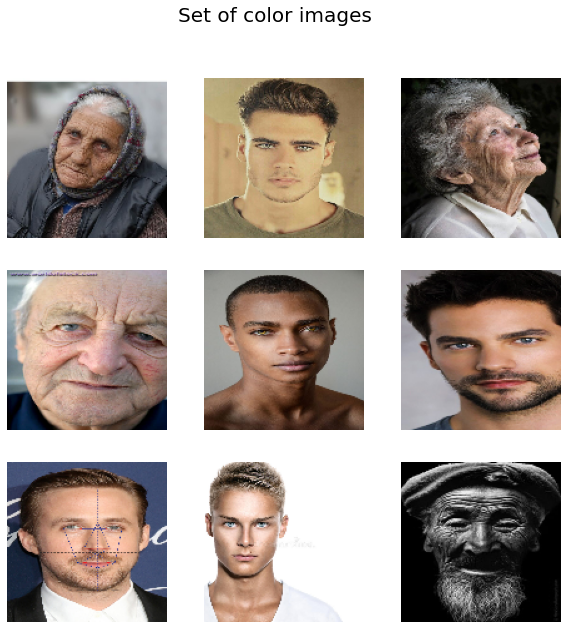

In [4]:
# showing the color images
def show_labels(labels):
    plt.figure(figsize=(10,10))
    for i in range(9):
        #idx=np.random.randint(0,len(labels))
        plt.subplot(3,3,i+1)
        img=labels[i]
        plt.axis('off')
        plt.imshow(img)

show_labels(labels)
plt.suptitle("Set of color images",fontsize=20)
plt.show()

Although most of the images are in RGB format there are few that are in Gray scale format which can influence on the result so that should be taken into account.

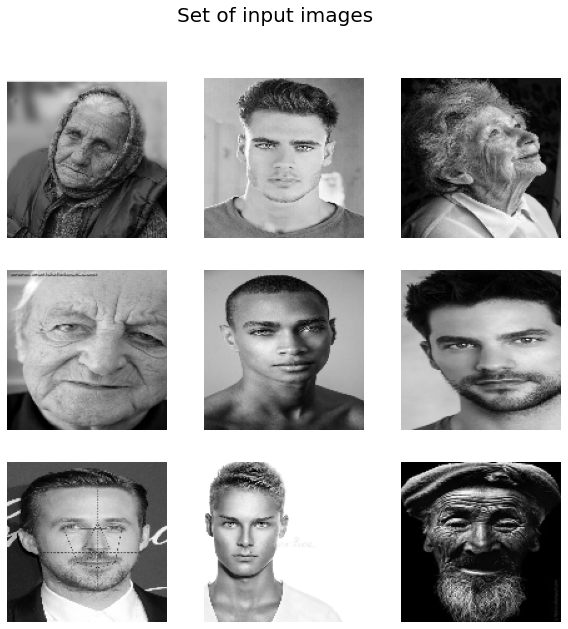

In [5]:
# showing the images in black and white
def show_input(inputs):
    plt.figure(figsize=(10,10))
    for i in range(9):
        #idx=np.random.randint(0,len(inputs))
        plt.subplot(3,3,i+1)
        img=inputs[i]
        plt.axis('off')
        plt.imshow(img,cmap='gray')
show_input(inputs)
plt.suptitle("Set of input images",fontsize=20)
plt.show()

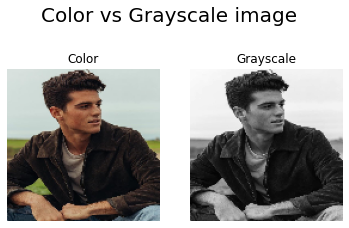

In [6]:
# comparing the one image from RGB to black and white
def images_compare(inputs,labels):
    idx_new=np.random.randint(0,len(labels))
    fig = plt.figure()
    ax1 = fig.add_subplot(1,2,1)
    ax1.set_title('Color')
    ax1.axis('off')
    ax1.imshow(labels[idx_new])
    ax2 = fig.add_subplot(1,2,2)
    ax2.set_title('Grayscale')
    ax2.axis('off')
    ax2.imshow(inputs[idx_new],cmap='gray')
    plt.suptitle("Color vs Grayscale image",fontsize=20)
    plt.show()
images_compare(inputs,labels)

# 2. Modeling
Training the data using U-Net architecture which is one of the CNN standard architectures for image classification tasks. 

## 2.1. Splitting the data
Dividing the data into two data sets.

In [7]:
# Splitting the data function
def split_data(inputs,labels,test_size=0.2):
    labels=np.array(labels)
    inputs=np.array(inputs)
    x_train, x_test, y_train, y_test = train_test_split(inputs, labels, test_size=test_size)
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.05)
    return x_train, x_valid,x_test ,y_train, y_valid,y_test

In [8]:
# Splitting the data
x_train, x_valid, x_test ,y_train, y_valid,y_test=split_data(inputs,labels,test_size=0.05)
x_train, x_valid, x_test=x_train/255.0,x_valid/255.0,x_test/255.0
y_train, y_valid, y_test=y_train/255.0,y_valid/255.0,y_test/255.0

## 2.2. Training
U-Net architecture mainly consists of two paths. One is an encoder path and other is a decoder path. The encoder path captures the context of the image producing feature maps. Encoder path is just a stack of convolution and max pooling layers. Decoder path used to enable precise localization using transposed convolutions. U-net only contains Convolutional layers and does not contain any Dense layer because of which it can accept image of any size.

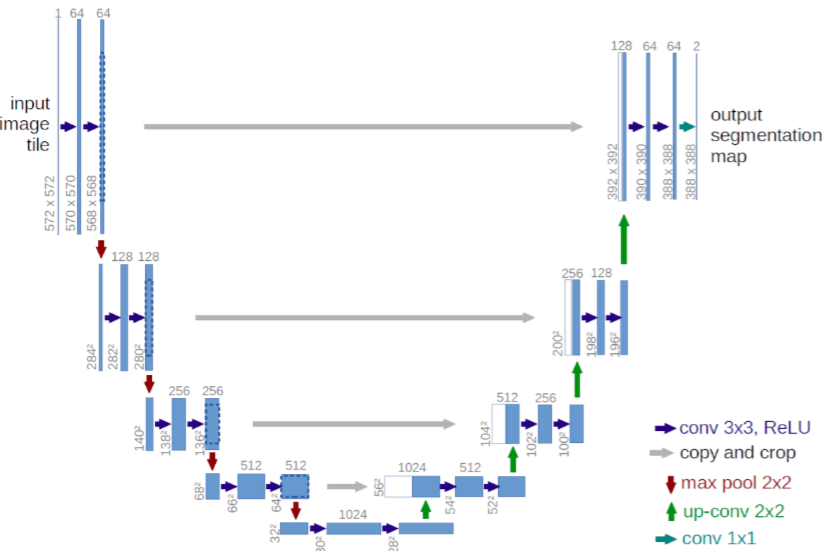

U-Net architecture is used for this problem because it is considered as one of the standard CNN architectures for image classification tasks. It is considered as a best network for fast and precise segmentation of images.

In [9]:
# Generating the U-Net model
def build_model(inputsize=(IMAGE_SIZE,IMAGE_SIZE,1)):
    input = tf.keras.Input(shape=(inputsize))

    conv = tfl.Conv2D(64, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv1')(
        input)
    x=tfl.BatchNormalization()(conv)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2D(64, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv2')(
        x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x1 = tfl.Conv2D(64, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv3')(
        x)
    x=tfl.BatchNormalization()(x1)
    x=tfl.LeakyReLU()(x)
    x = tfl.MaxPool2D(pool_size=(2, 2), strides=(2, 2), name='MaxPool1')(x)

    x = tfl.Conv2D(128, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv4')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2D(128, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv5')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x2 = tfl.Conv2D(128, (3, 3), padding="same", strides=(1, 1),kernel_initializer='he_normal',
                    name='Conv6')(x)
    x=tfl.BatchNormalization()(x2)
    x=tfl.LeakyReLU()(x)
    x = tfl.MaxPool2D(pool_size=(2, 2), name='MaxPool2')(x)

    x = tfl.Conv2D(256, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv7')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2D(256, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv8')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x3 = tfl.Conv2D(256, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv9')(x)
    x=tfl.BatchNormalization()(x3)
    x=tfl.LeakyReLU()(x)
    x = tfl.MaxPool2D(pool_size=(2, 2), strides=(2, 2), name='MaxPool3')(x)

    
    x = tfl.Conv2D(512, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv10')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2D(512, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv11')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x4 = tfl.Conv2D(512, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv12')(x)
    x=tfl.BatchNormalization()(x4)
    x=tfl.LeakyReLU()(x)
    x = tfl.MaxPool2D(pool_size=(2, 2), strides=(2, 2), name='MaxPool4')(x)

    x = tfl.Conv2D(1024, (3, 3), padding="same",name='Conv13')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2D(1024, (3, 3), padding="same",name='Conv14')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2D(1024, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv15')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2DTranspose(512, (3, 3), strides=2, padding="same")(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)

    x = tfl.concatenate([x, x4], axis=3)
    
    x = tfl.Conv2D(512, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv16')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2D(512, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv17')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2D(512, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv18')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2DTranspose(256, (3, 3), strides=2, padding="same")(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)

    x = tfl.concatenate([x, x3], axis=3)

    x = tfl.Conv2D(256, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv19')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2D(256, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv20')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2D(256, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv21')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2DTranspose(128, (3, 3), strides=2, padding="same")(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)

    x = tfl.concatenate([x, x2], axis=3)

    x = tfl.Conv2D(128, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv22')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2D(128, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv23')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2D(128, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv24')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2DTranspose(64, (3, 3), strides=2, padding="same")(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)

    x = tfl.concatenate([x, x1], axis=3)

    x = tfl.Conv2D(64, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv25')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2D(64, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv26')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2D(64, (3, 3), padding="same",name='Conv27')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    outputs = tfl.Conv2D(3, (1, 1), padding="same", activation='sigmoid', name='Outputs')(x)
    final_model = tf.keras.Model(inputs=input, outputs=outputs)
    final_model.summary()
    return final_model

In [10]:
# Setting callbacks
def callbacks(patience=5):
    # Saving the best parameters
    checkpoint = tf.keras.callbacks.ModelCheckpoint('seg_model.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
    # Earlystopping callback was used to prevent from the model to be trained if there is no additional change.
    early=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=patience,min_delta=0.001)
    callbacks_list=[checkpoint, early]
    return callbacks_list

In [11]:
# Creating the model 1
mymodel1=build_model()

2022-10-09 20:10:04.388933: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-09 20:10:04.399972: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-09 20:10:04.400736: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-09 20:10:04.401884: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 128, 128, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 64) 256         Conv1[0][0]                      
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 128, 128, 64) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [12]:
# Training the data with 10 EPOCHS
mymodel1.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.0, nesterov=True),loss=tf.keras.losses.mean_squared_error,metrics=['acc'])
hist1=mymodel1.fit(x_train,y_train,batch_size=8,epochs=10,validation_data=(x_valid,y_valid),callbacks=callbacks())

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
2022-10-09 20:10:06.512767: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 421199872 exceeds 10% of free system memory.
2022-10-09 20:10:08.242616: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1263599616 exceeds 10% of free system memory.
2022-10-09 20:10:09.793031: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 421199872 exceeds 10% of free system memory.
2022-10-09 20:10:10.187993: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1263599616 exceeds 10% of free system memory.
2022-10-09 20:10:11.349787: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-10-09 20:10:14.611399: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


804/804 [==============================] - ETA: 0s - loss: 0.0101 - acc: 0.6093

2022-10-09 20:11:52.701824: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 22216704 exceeds 10% of free system memory.


804/804 [==============================] - 104s 116ms/step - loss: 0.0101 - acc: 0.6093 - val_loss: 0.0050 - val_acc: 0.6866

Epoch 00001: val_loss improved from inf to 0.00500, saving model to seg_model.h5
Epoch 2/10
804/804 [==============================] - 92s 115ms/step - loss: 0.0071 - acc: 0.7144 - val_loss: 0.0042 - val_acc: 0.7186

Epoch 00002: val_loss improved from 0.00500 to 0.00424, saving model to seg_model.h5
Epoch 3/10
804/804 [==============================] - 92s 114ms/step - loss: 0.0065 - acc: 0.7238 - val_loss: 0.0042 - val_acc: 0.7397

Epoch 00003: val_loss improved from 0.00424 to 0.00417, saving model to seg_model.h5
Epoch 4/10
804/804 [==============================] - 92s 114ms/step - loss: 0.0062 - acc: 0.7269 - val_loss: 0.0039 - val_acc: 0.7223

Epoch 00004: val_loss improved from 0.00417 to 0.00386, saving model to seg_model.h5
Epoch 5/10
804/804 [==============================] - 92s 114ms/step - loss: 0.0062 - acc: 0.7331 - val_loss: 0.0038 - val_acc: 0.

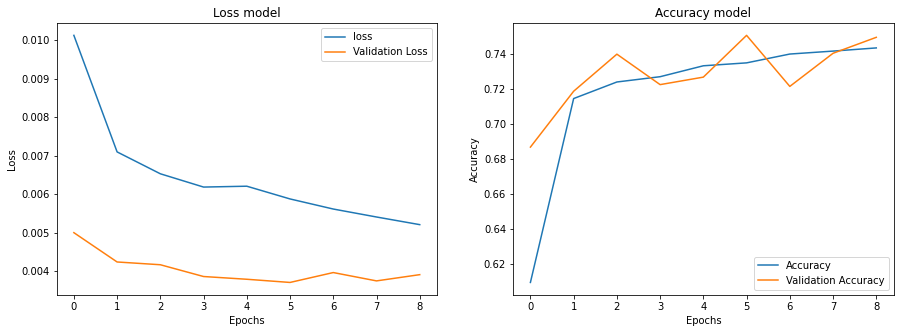

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title("Loss model")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["loss","Validation Loss"])

plt.subplot(1,2,2)
plt.plot(hist1.history["acc"])
plt.plot(hist1.history['val_acc'])
plt.title("Accuracy model")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Accuracy","Validation Accuracy"])

plt.show()

**Loss model**

The loss model shows that the validation loss is much lower than the training loss which suggest that the model is underfitting since the model is not able to perform on the training set. 

**Accuracy model**

The validation accuracy decreases at epoch number 2 and 5. The accuracy increases but it meets with validation accuracy at epoch 2.5, 4, 5 and 7.

In [14]:
# Prediction
pred1=mymodel1.predict(x_test)

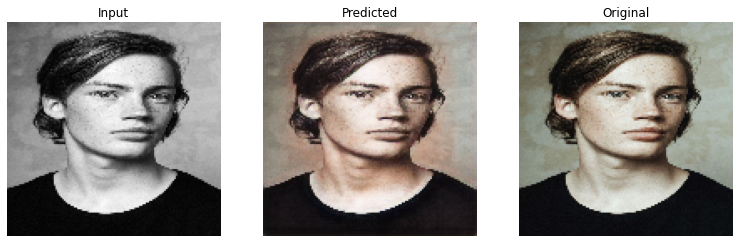

In [15]:
# Plotting the results
plt.figure(figsize=(13,5))
plt.subplot(1,3,1)
plt.title('Input')
plt.axis('off')
plt.imshow(x_test[4], cmap='gray')

plt.subplot(1,3,2)
plt.title('Predicted')
plt.axis('off')
plt.imshow(pred1[4])

plt.subplot(1,3,3)
plt.title('Original')
plt.axis('off')
plt.imshow(y_test[4])
plt.show()

# 3. Tuning the hyperparameters
As I started with a low number of epochs to get quick feedback on the rest of hyperparameters. I will increase the number of epochs to 200 and batch size to 32.

In [16]:
# Creating the model 2
mymodel2=build_model()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 128, 128, 64) 640         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_31 (BatchNo (None, 128, 128, 64) 256         Conv1[0][0]                      
__________________________________________________________________________________________________
leaky_re_lu_31 (LeakyReLU)      (None, 128, 128, 64) 0           batch_normalization_31[0][0]     
____________________________________________________________________________________________

In [17]:
mymodel2.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.0, nesterov=True),loss=tf.keras.losses.mean_squared_error,metrics=['acc'])
hist2=mymodel2.fit(x_train,y_train,batch_size=32,epochs=200,validation_data=(x_valid,y_valid),callbacks=callbacks())

Epoch 1/200
201/201 [==============================] - 74s 349ms/step - loss: 0.0160 - acc: 0.4267 - val_loss: 0.0158 - val_acc: 0.6633

Epoch 00001: val_loss improved from inf to 0.01583, saving model to seg_model.h5
Epoch 2/200
201/201 [==============================] - 67s 333ms/step - loss: 0.0077 - acc: 0.5667 - val_loss: 0.0062 - val_acc: 0.6868

Epoch 00002: val_loss improved from 0.01583 to 0.00616, saving model to seg_model.h5
Epoch 3/200
201/201 [==============================] - 67s 333ms/step - loss: 0.0061 - acc: 0.6396 - val_loss: 0.0051 - val_acc: 0.6849

Epoch 00003: val_loss improved from 0.00616 to 0.00514, saving model to seg_model.h5
Epoch 4/200
201/201 [==============================] - 67s 333ms/step - loss: 0.0056 - acc: 0.6799 - val_loss: 0.0048 - val_acc: 0.6974

Epoch 00004: val_loss improved from 0.00514 to 0.00477, saving model to seg_model.h5
Epoch 5/200
201/201 [==============================] - 67s 332ms/step - loss: 0.0053 - acc: 0.6981 - val_loss: 0.004

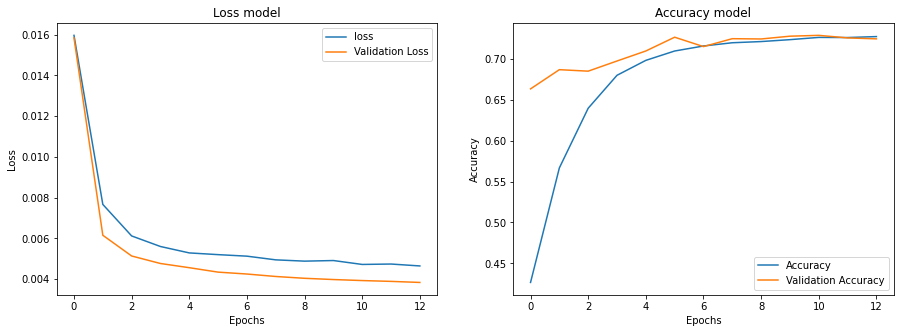

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title("Loss model")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["loss","Validation Loss"])

plt.subplot(1,2,2)
plt.plot(hist2.history["acc"])
plt.plot(hist2.history['val_acc'])
plt.title("Accuracy model")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Accuracy","Validation Accuracy"])

plt.show()

**Loss model**

At certain epochs the validation loss is lower than the validation loss which suggest that the model is underfitting since the model is not able to perform on the training set.

**Accuracy model**

The accuracy and validation accuracy stabilizes at epoch number 6.

In [19]:
# Prediction
pred2=mymodel1.predict(x_test)

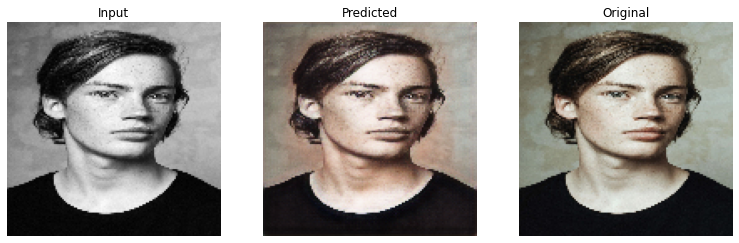

In [20]:
# Plotting the results
plt.figure(figsize=(13,5))
plt.subplot(1,3,1)
plt.title('Input')
plt.axis('off')
plt.imshow(x_test[4], cmap='gray')

plt.subplot(1,3,2)
plt.title('Predicted')
plt.axis('off')
plt.imshow(pred2[4])

plt.subplot(1,3,3)
plt.title('Original')
plt.axis('off')
plt.imshow(y_test[4])
plt.show()

# 4. Discussion

## 4.1. Conclusion

I used the U-Net architecture which is one of the CNN standard architectures for image classification tasks and it is considered as a best network for fast and precise segmentation of images. For the first try, I used 10 epochs with 8 batch size. The model performed poorly to colorize a grayscale image. Then, I tuned the hyperparameters using 200 epochs and 32 batch size. However, the results are nearly identical.

## 4.2. Further improvement

For further improvement, I would like to use GAN and try other colorization techniques. With GAN, the model can predict whether an image is "real" in terms of colorization. 